In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
firedata=pd.read_csv("forestfires.csv")

In [3]:
firedata.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
firedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
firedata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
firedata.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
firedata

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [8]:
plt.figure(figsize=(10,10))
corr= firedata.corr()


<Figure size 720x720 with 0 Axes>

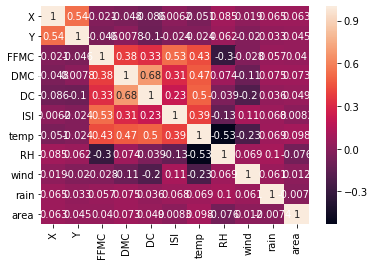

In [9]:
sns.heatmap(corr,annot=True)

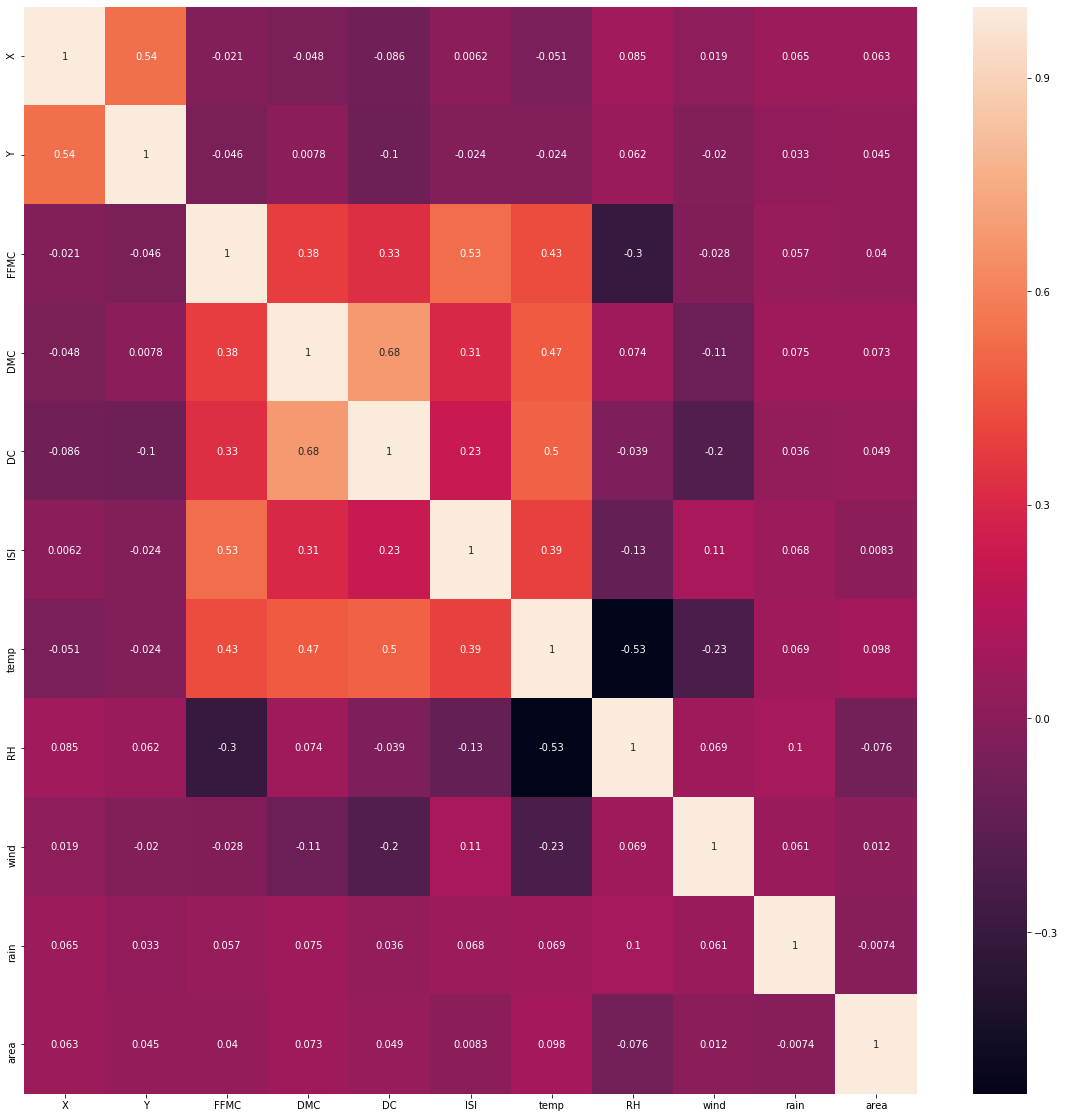

In [10]:
plt.figure(figsize=(20,20))
corr= firedata.corr()
sns.heatmap(corr,annot=True)

In [11]:
corr

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [12]:
#DMC = duff moisture code
#DC = Drought code
#ISI = initial spread index
#RH = relative humidity

In [13]:
from pycaret.regression import *


In [14]:
exp_reg101 = setup(data = firedata, target = 'DMC', session_id=123)


 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(517, 13)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [16]:
lr = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.49,1737,41.67,0.6291,0.7346,1.22
1,28.16,1659,40.74,0.6669,0.353,0.3831
2,28.17,1293,35.95,0.7315,0.5442,0.669
3,23.83,891.8,29.86,0.8109,0.4551,0.3816
4,28.11,1864,43.17,0.5879,0.6005,0.3768
5,31.6,2264,47.58,0.5593,0.7254,1.487
6,23.43,716,26.76,0.6049,0.2691,0.2429
7,20.8,809.2,28.45,0.7161,0.5468,0.4454
8,25.79,1379,37.13,0.5477,0.5249,0.746
9,23.03,958.8,30.96,0.7249,0.3176,0.2349


In [17]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,11.42,473,20.75,0.8775,0.2242,0.1681,0.4198
1,CatBoost Regressor,13.8,526.8,22.06,0.8492,0.2937,0.2387,3.084
2,Random Forest,11.57,513.4,21.26,0.8403,0.2258,0.1733,0.4553
3,Extreme Gradient Boosting,10.83,468.5,20.04,0.8356,0.211,0.1527,0.1442
4,Gradient Boosting Regressor,14.89,582.8,22.93,0.8219,0.2643,0.2155,0.1683
5,Light Gradient Boosting Machine,17.42,746.3,26.6,0.8131,0.315,0.2716,0.13
6,Decision Tree,9.97,664.6,22.9,0.7821,0.2524,0.1603,0.0161
7,AdaBoost Regressor,23.01,901.9,29.45,0.7423,0.4671,0.5497,0.1888
8,Ridge Regression,26.49,1305,35.41,0.6767,0.485,0.541,0.0238
9,Random Sample Consensus,26.49,1349,36.11,0.6589,0.476,0.59,0.306


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [19]:
reg = setup(data = firedata, target = 'FFMC')


 
Setup Succesfully Completed.


,Description,Value
0,session_id,2797
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(517, 13)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,0.8316,7.249,1.752,0.8496,0.0311,0.0147,0.1295
1,Gradient Boosting Regressor,0.9517,7.542,1.82,0.8328,0.0323,0.0162,0.1576
2,Random Forest,0.9305,9.014,2.041,0.8049,0.0354,0.0166,0.6151
3,CatBoost Regressor,0.9322,12.48,2.184,0.7953,0.0374,0.0179,3.169
4,Extra Trees Regressor,0.9198,12.53,2.304,0.7843,0.0392,0.0177,0.4021
5,AdaBoost Regressor,1.24,8.137,2.17,0.7563,0.0361,0.0192,0.1559
6,Decision Tree,1.024,9.472,2.359,0.7273,0.0389,0.0171,0.0326
7,Light Gradient Boosting Machine,1.254,13.39,2.653,0.6433,0.0433,0.0214,0.0994
8,K Neighbors Regressor,1.509,19.98,3.299,0.5205,0.0505,0.0257,0.0131
9,Random Sample Consensus,1.609,19.94,3.358,0.4872,0.051,0.0264,0.3068


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2797, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [21]:
xgb = create_model('xgboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4621,0.4876,0.6983,0.9409,0.0075,0.0051
1,0.7745,2.507,1.583,0.8621,0.0192,0.0091
2,0.5152,0.496,0.7043,0.9509,0.0078,0.0057
3,0.9953,1.904,1.38,0.9388,0.0157,0.0112
4,0.86,1.442,1.201,0.7317,0.0132,0.0095
5,0.6313,0.9095,0.9537,0.9061,0.0106,0.007
6,0.6898,1.41,1.187,0.7832,0.013,0.0077
7,0.7156,1.343,1.159,0.8097,0.0129,0.008
8,2.13,61.32,7.83,0.5966,0.202,0.0781
9,0.5423,0.6706,0.8189,0.976,0.0088,0.0059


In [23]:
tuned_xgb = tune_model(xgb)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.007,1.704,1.306,0.7936,0.0144,0.0111
1,0.9493,1.75,1.323,0.9038,0.0154,0.0107
2,0.9069,1.174,1.083,0.8838,0.0119,0.0101
3,1.063,1.83,1.353,0.9412,0.0153,0.012
4,1.037,2.122,1.457,0.6052,0.016,0.0115
5,0.9136,1.349,1.162,0.8607,0.0129,0.0102
6,0.8699,1.561,1.249,0.76,0.0139,0.0097
7,0.9437,1.788,1.337,0.7466,0.0147,0.0104
8,2.293,56.22,7.498,0.6301,0.1969,0.0774
9,0.9097,1.457,1.207,0.9478,0.0133,0.0101


In [24]:
model = create_model('error')
plot_model(model)

SystemExit: (Value Error): Estimator Not Available. Please see docstring for list of available estimators.

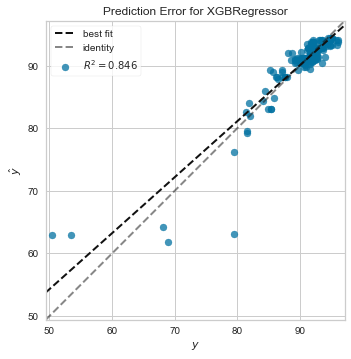

In [25]:
plot_model(tuned_xgb, plot='error')


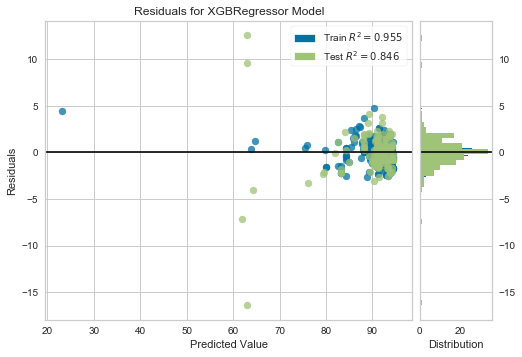

In [26]:
plot_model(tuned_xgb, plot='residuals')


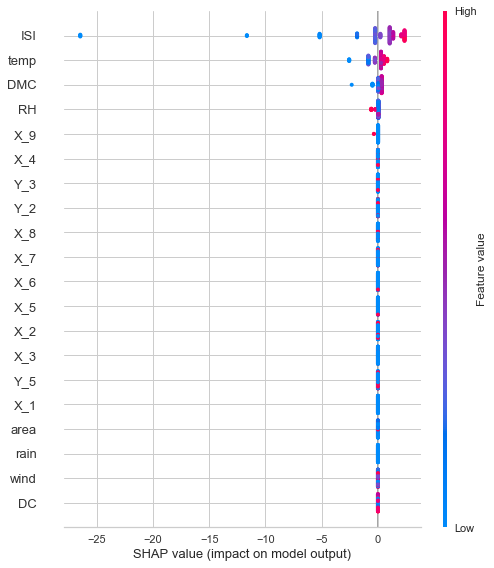

In [28]:
interpret_model(tuned_xgb,plot="summary")


In [29]:
predict_model(tuned_xgb)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,1.3218,5.4955,2.3442,0.846,0.0335,0.0163


,DMC,DC,ISI,temp,RH,wind,rain,area,X_1,X_2,...,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,FFMC,Label
0,3.7,9.3,2.9,5.3,78.0,3.1,0.0,0.00,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.1,82.025002
1,101.3,423.4,14.7,18.2,82.0,4.5,0.0,2.21,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,93.7,92.922997
2,114.3,661.3,6.3,18.6,44.0,4.5,0.0,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,91.7,91.231400
3,3.0,106.7,1.1,11.8,31.0,4.5,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,79.5,63.083698
4,222.4,698.6,13.9,26.2,34.0,5.8,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94.8,94.110397
5,23.9,64.7,4.1,14.0,39.0,3.1,0.0,0.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,87.2,88.203499
6,126.5,686.5,7.0,14.7,70.0,3.6,0.0,0.00,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90.9,90.104599
7,99.6,631.2,6.3,19.2,44.0,2.7,0.0,4.69,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,90.2,90.934700
8,46.2,706.6,0.4,12.2,78.0,6.3,0.0,0.00,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.4,62.983601
9,181.1,671.2,14.3,21.6,65.0,4.9,0.8,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,96.1,93.842300
